# Netflix Movies and TV Shows Analysis 

In this project, we will explore the Netflix dataset to understand trends, content distribution, and some interesting patterns.

**Main Steps:**
- Load and inspect the data
- Clean and preprocess the data
- Perform exploratory data analysis (EDA)
- Visualize insights

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1. Dataset Overview

Let's inspect the general information about the dataset:
- Number of rows and columns
- Data types
- Missing values

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# 2. Data Cleaning

We will handle missing values:
- 'director' and 'cast' columns will be kept as is.
- 'country' missing values will be filled with 'Unknown'.
- 'date_added' missing values will be filled with 'Unknown'.
- Rows with missing 'rating' or 'duration' will be dropped.


In [7]:
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
df.dropna(subset=['rating', 'duration'], inplace=True)
df.isnull().sum()

/tmp/ipykernel_13/3650035059.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
/tmp/ipykernel_13/3650035059.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

show_id            0
type               0
title              0
director        2631
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

# 3. Data Formatting

- Converted 'date_added' column to datetime format
- Separated Movies and TV Shows for better analysis
- Extracted duration in minutes for Movies
- Extracted number of seasons for TV Shows

In [8]:
df['date_added']=pd.to_datetime(df['date_added'], errors='coerce')

In [9]:
movies=df[df['type']=='Movie'].copy()
tv_shows=df[df['type']=='TV Show'].copy()

In [10]:
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

In [11]:
tv_shows['duration_seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

In [12]:
movies.head(), tv_shows.head()

(   show_id   type                             title  \
 0       s1  Movie              Dick Johnson Is Dead   
 6       s7  Movie  My Little Pony: A New Generation   
 7       s8  Movie                           Sankofa   
 9      s10  Movie                      The Starling   
 12     s13  Movie                      Je Suis Karl   
 
                          director  \
 0                 Kirsten Johnson   
 6   Robert Cullen, José Luis Ucha   
 7                    Haile Gerima   
 9                  Theodore Melfi   
 12            Christian Schwochow   
 
                                                  cast  \
 0                                                 NaN   
 6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
 7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
 9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
 12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
 
                                               country date_added  \
 0           

# 4. EDA - Exploratory Data Analysis

- Number of Movies vs TV Shows
- Top 10 Countries by Content Production
- Content added over the Years
- Rating Distribution

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

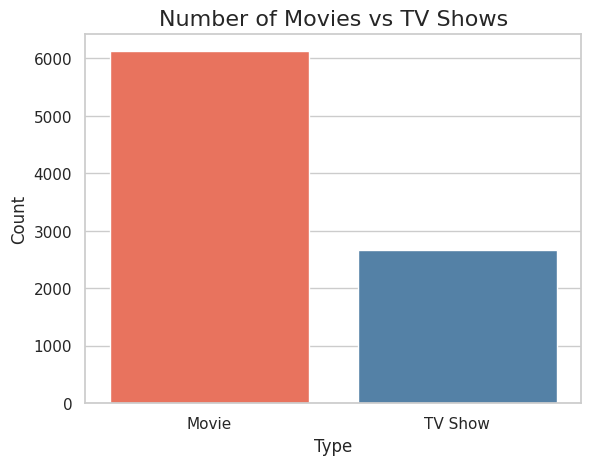

In [15]:
sns.countplot(data=df, x='type',palette=['#FF6347', '#4682B4'])
plt.title('Number of Movies vs TV Shows', fontsize=16)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**Type distribution**

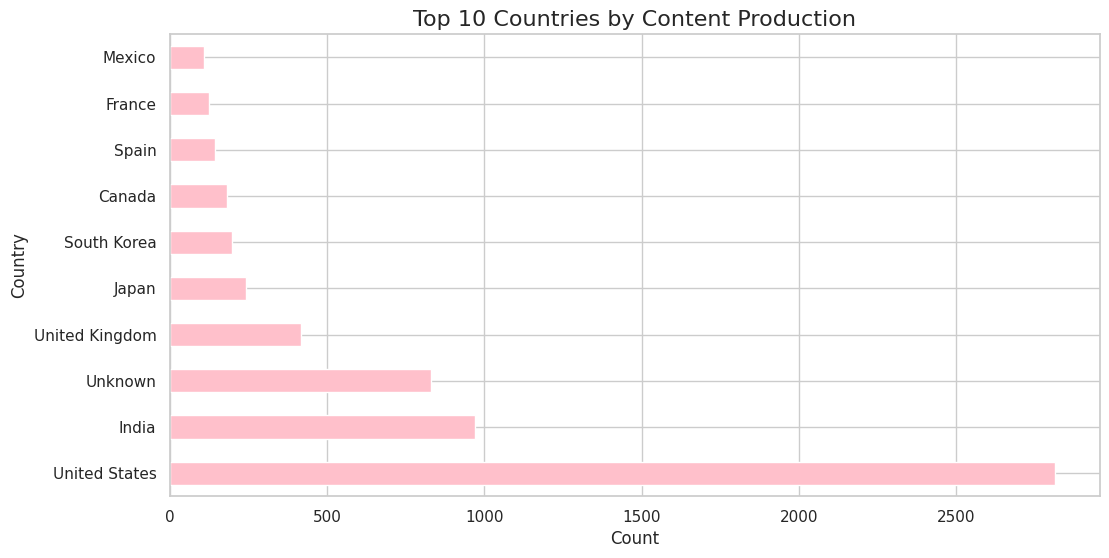

In [16]:
plt.figure(figsize=(12,6))
df['country'].value_counts().head(10).plot(kind='barh', color='pink')
plt.title('Top 10 Countries by Content Production', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

**Top content creators by country**

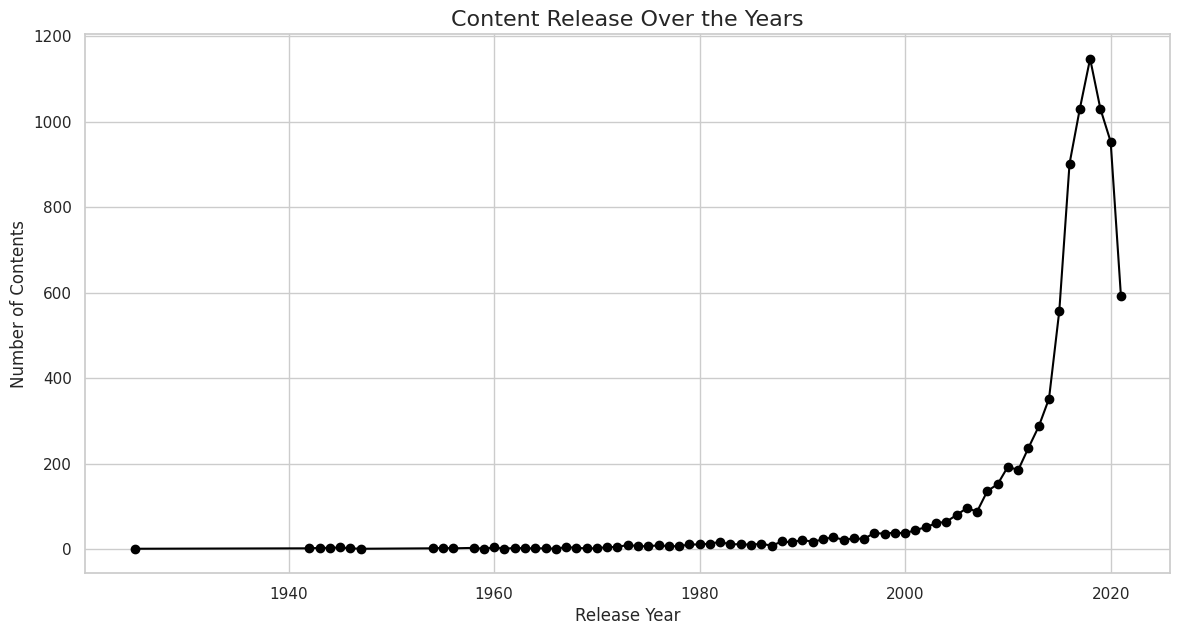

In [17]:
plt.figure(figsize=(14,7))
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='black')
plt.title('Content Release Over the Years', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Contents')
plt.grid(True)
plt.show()

**Distribution of content by year**

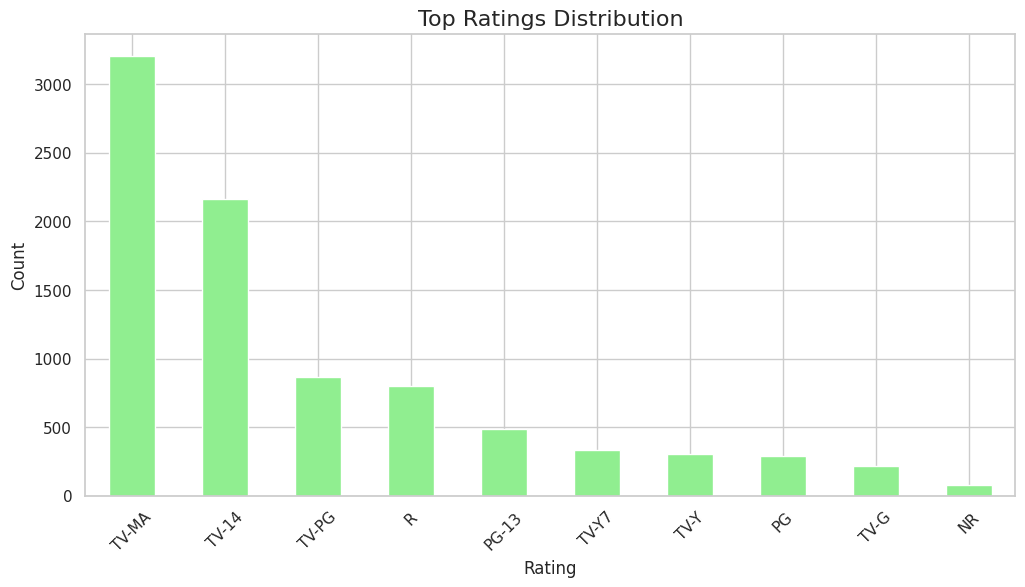

In [18]:
plt.figure(figsize=(12,6))
df['rating'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top Ratings Distribution', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Rating distribution**

<p style="font-size:18px;">Conclusion
In this project, we have explored and analyzed the Netflix dataset using various data cleaning and visualization techniques. We successfully handled missing data, transformed columns, and created new features to improve the dataset's usability. By visualizing the distribution of movies and TV shows, we gained valuable insights into the content available on Netflix.
With our cleaned and transformed dataset, we can now proceed to more advanced analysis or build predictive models, such as movie recommendations or content popularity prediction. The possibilities are endless!</p>